# 3. 신경망 (Neural Network)

* Perceptron은 복잡한 함수도 표현이 가능

> ex) 컴퓨터가 수행하는 복잡한 처리도 표현 가능, 하지만 가중치(weight)를 설정하는 작업 <br> (원하는 결과를 출력하도록 가중치 값을 적절히 정하는 작업)은 여전히 사람이 수동으로 조정. <br> 이전에는 AND, OR 게이트의 logic table을 보면서 적절한 가중치 값을 정함  

*  신경망(neural network)는 위와 같은 문제를 해결해줌.<br> (**가중치의 매개변수의 적절한 값을 데이터로부터 자동으로 학습하는 능력이 신경망의 중요한 성질**)

-----

![대체 텍스트](https://cs231n.github.io/assets/nn1/neural_net2.jpeg)

![대체 텍스트](https://www.bogotobogo.com/python/scikit-learn/images/NeuralNetwork1/NN-with-components-w11-etc.png)

* 신경망을 그림으로 나타내면 가장 왼쪽(left_side)부터 입력층(input_layer), 은닉층(hidden_layer), 맨 오른쪽은 출력층(output_layer)<br>
은닉층의 neuron은 (input,output layer와 달리) 사람의 눈에 보이지 않음, 그래서 은닉이라 불림.<br>

 입력층 ~ 출력층 방향을 차례로 0층, 1층, 2층이라 불림.<br>
(층 번호를 0부터 시작하는 이유는 파이썬 배열의 index도 0부터 시작하기 때문에)



# 3.0 퍼셉트론 복습

![대체 텍스트](https://camo.githubusercontent.com/f0d961dd32542cd3aaff5ef3be082dbc0b7c5d5e/68747470733a2f2f692e737461636b2e696d6775722e636f6d2f386d4e4b562e706e67)

* 위의 그림과 같이 x1, x2라는 2개의 신호를 입력받아 y를 출력하는 perceptron이다.

----
<br>
\begin{align}
y = 0 \space (b + w_1x_1 + w_2x_2 \leq 0) 
\end{align}
\begin{align}
y= 1 \space (b + w_1x_1 + w_2x_2 > 0)
\end{align}

<br>
* 위의 식에서 b는 **편향(bias)**을 나타내는 매개변수로 뉴런이 얼마나 쉽게 활성화되는냐를 제어한다. <br> 또한 w1, w2는 각 신호의 **가중치(weight)**를 나타내는 매개변수로, 각 신호의 영향력을 제어한다.

![대체 텍스트](https://user-images.githubusercontent.com/56021593/76699308-aafac700-66ef-11ea-952d-b4718d19e754.JPG)

위의 식과 같이 퍼셉트론에 편향을 표시하면 위의 그림과 같다.가중치가 b이고 입력이 1인 뉴런이 추가되었다. 

이 퍼셉트론의 동작은 x1, x2, 1이라는 3개의 신호가 뉴런에 입력되어, 각 신호에 가중치를 곱한 후, 다음 뉴런에 전달된다.<br> **다음 뉴런에서는 이들 신호의 값을 더하여, 그 합이 0을 넘으면 1을 출력하고 그렇지 않으면 0을 출력한다.** 

<br>

편향의 입력신호는 항상 1이기 때문에 그림에서는 해당 뉴런을 회색으로 채워 다른 뉴런과 구별했다.


# 3.1 활성화 함수 (Activation function)

 * **정의**: 입력 신호의 총합을 출력 신호로 변환하는 함수 / 입력 신호의 총합이 활성화를 일으키는 정함


<br>
\begin{align}
a =  b + w1 x1 + w2 x2        
\end{align}
\begin{align}
y = h(a)
\end{align}


* 위의 식은 가중치가 달린 입력 신호와 편향(bias)의 총합을 계산하고 이를 a라고 한다.

* 아래의 식은 a를 함수 h()에 넣어 y를 출력하는 흐름 




![대체 텍스트](https://user-images.githubusercontent.com/56021593/76699436-d16d3200-66f0-11ea-8d37-01f8092b9410.png)

<figcaption>  위의 식들을 그림으로 표현 </figcaption>

<br>

가중치 신호를 조합한 결과가 a라는 노드가 되고, 활성화 함수 h()를 통과하여 y라는 노드로 변환되는 과정

![대체 텍스트](https://user-images.githubusercontent.com/56021593/76699471-1e510880-66f1-11ea-8211-da3c9e62ac48.png)

위에 왼쪽 그림은 일반적인 뉴런을 나타내고, 오른쪽은 활성화 처리 과정을<br> 명시한 뉴런(a는 입력 신호의 총합, h()는 활성화 함수, y는 출력을 의미한다.

<br>

**단순 퍼셉트론**은 단층 네트워크에서 계단 함수(임계값을 경계로 출력이 바뀌는 함수)를 <br> 활성화 함수라 사용한 모델을 가리키고 **다층 퍼셉트론**은 신경망 (여러층으로 구성되고<br> 시그모이드 함수 등의 매끈한 활성화 함수를 사용하는 네트워크)을 가리킨다. 

# 3.12 계단 함수 (step function)

In [0]:
def step_function(x):                          # 여기서 인수 x는 실수(부동소수점)만 받아들인다. 즉 step_function(3.0)은 되지만 step_function(np.array([1.0, 2.0]))은 안된다.
  y = x > 0                                    # 계단 함수는 입력이 0을 넘으면 1출력, 그 외에는 0을 출력
  return y.astype(np.int)                      

In [0]:
import numpy as np                             # Numpy 배열을 부등호 연산에 수행하면 배열의 원소 각각에 부등호 연산을 수행한 bool배열이 생성
import matplotlib.pylab as plt

x = np.array([-1.0,1.0,2.0])
x

array([-1.,  1.,  2.])

In [0]:
y = x > 0                                      # 배열 x의 원소 각각이 0 보다 크면 True로, 0 이하면 False로 변환한 새로운 배열 y가 생성
y                                              # y는 bool 배열이다. 하지만 우리가 원하는 계단 함수는 0이나 1의 int형을 출력하는 함수. 그래서 배열y의 원소를 bool에서 int형으로 바꾼다.

array([False,  True,  True])

In [0]:
y = y.astype(np.int)                          # Numpy의 배열 형 자료를 변환할 때는 astype() 메서드를 이용
y                                             # 파이썬에서는 bool을 int로 변환하면 True는 1로, False는 0으로 변환

array([0, 1, 1])

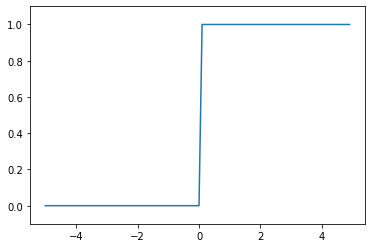

In [0]:
def step_function(x):
  return np.array(x > 0, dtype=np.int)       # 계단 함수는 입력(x)가 0보다 크거나, 데이터 타입이 int로 선언했을 때 리턴값을 준다.

np.arange                                    # np.arange() 함수는 인자로 받는 값 만큼 1씩 증가하는 1차원 array를 만든다.  

x = np.arange(-5.0, 5.0, 0.1)                # (-5.0 ~ 5.0까지) 0.1 간격으로 배열 생성 / numpy.arange([start, ] stop, [step, ] dtype=None)
y = step_function(x)                         # step_function()은 인수로 받은 Numpy 배열의 원소 각각을 인수로 계단 함수를 실행해, 그 결과를 다시 배열로 만듦

plt.plot(x, y)                               # plotting x & y axis
plt.ylim(-0.1, 1.1)                          # y 축의 범위 지정
plt.show()                                   # plot을 show 함수를 이용해서 시각화
                                             # 계단 함수는 0을 경계로 출력이 0에서 1(또는 1에서 0)로 바뀜 / vise versa

* 위의 그래프와 같이 계단 함수는 0을 경계로 출력이 0에서 1(또는 1에서 0)로 바뀐다. 

# 3.12 시그모이드 함수 (Sigmoid function)

In [0]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))                     # np.exp(-x)는 exp(-x) 수식에 해당

x = np.array([-1.0, 1.0, 2.0])                    # Broadcast 기능을 이용,  Numpy 배열과 Scalar값 연산을 Numpy 배열의 원소 각각과 스칼라값의 연산으로 바꿔 수행
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

In [0]:
t = np.array([1.0, 2.0, 3.0])                     # t에 배열(벡터)를 대입
1.0 + t                                           # Scalar값 1.0과 Numpy 배열 사이에서 수치 연산(+ / -)를 실행

array([2., 3., 4.])

In [0]:
1.0 / t                                           # 결과적으로 scalar값과 Numpy 배열의 각 원소 사이에 연산이 이루어지고, 연산 결과 Numpy 배열로 출력

array([1.        , 0.5       , 0.33333333])

<function matplotlib.pyplot.show>

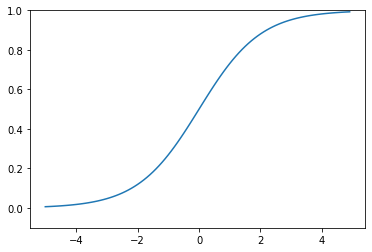

In [0]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)                                     # y를 출력하는 함수를 sigmoid 함수로 변경 
plt.plot(x,y)                                      # x축 y축을 그려서 시각화
plt.ylim(-0.1, 1,1)                                # y축(y-axis)의 범위 지정
plt.show

#3.13 ReLU 함수 (ReLu function)

* ReLU (Rectified Linear Unit)는 입력이 0이 넘으면 그 입력을 그대로 출력하고, 0 이하면 0을 출력하는 함수
<br>
<br>

-----
<br>
<br>

\begin{align}
h(x) =  x \space(x>0)
\end{align}

\begin{align}
h(x) =  x \space(x\leq0)  
\end{align}
<br>
<br>
* ReLU 함수를 수식으로 나타내면 위와 같다.<br>
* ReLU에서 'Rectified' 란 정류된 이란 의미를 가지고 있음.  

In [0]:
def relu(x):
    return np.maximum(0, x)                          # Numpy의 maximum 함수를 사용하여 두 입력 중 큰 값을 선택해 반환하는 함수 

# 3.2 다차원 배열의 계산
* 다차원 배열의 기본은 '숫자의 집합'이다. 숫자가 한 줄로 늘어선 것이나 직사각형으로 늘어 놓은 것, 3차원으로 늘어놓은 것이나, N차원(4,5...)으로 나열하는 것을 통틀어 다차원 배열이라고 함

In [0]:
import numpy as np
A = np.array([1,2,3,4])                     # 1차원으로 배열로 생성
print(A)

np.ndim(A)                                  # 배열의 차원 수는 np.ndim()으로 확인이 가능

[1 2 3 4]


1

In [0]:
A.shape                                     # 배열의 형상은 인스턴스 변수인 shape로 알 수 있음

(4,)

In [0]:
A.shape[0]

4

In [0]:
B = np.array([[1.2],[3,4],[5,6]])
print(B)

np.ndim(B)

[list([1.2]) list([3, 4]) list([5, 6])]


1

In [0]:
B.shape

(3,)

# 3.21 행렬의 내적

In [0]:
A = np.array([[1,2],[3,4]])
A.shape

(2, 2)

In [0]:
B = np.array([[5,6],[7,8]])
B.shape

(2, 2)

In [0]:
np.dot(A,B)                      # np.dot()으로 행렬의 곱 구현

array([[19, 22],
       [43, 50]])

In [0]:
A = np.array([[1,3,5],[2,4,6]])
A.shape

(2, 3)

In [0]:
B = np.array([[1,3],[2,5],[4,6,]])
B.shape

(3, 2)

In [0]:
np.dot(A,B)

array([[27, 48],
       [34, 62]])

In [0]:
A = np.array([[1,2],[3,4],[5,6]])
A.shape

(3, 2)

In [0]:
B = np.array([7,8])
B.shape

(2,)

In [0]:
np.dot(A,B)

array([23, 53, 83])

# 3.22 신경망의 내적

In [0]:
X = np.array([1,2])
X.shape

(2,)

![대체 텍스트](https://user-images.githubusercontent.com/56021593/76699827-78070200-66f4-11ea-8292-4ef196b1dc8a.png)

행렬과 곱으로 신경망의 계산을 수행하는 법. <br>
아래 코드의 구현엣도 X, W, Y의 형상을 봤을 때, 특히 X와 W의 대응하는 차원의 원소 수가 같아야 한다.

In [0]:
W = np.array([[1,3,5],[2,4,6]])                           # W = weight(가중치을 의미)
print(W)

W.shape

[[1 3 5]
 [2 4 6]]


(2, 3)

In [0]:
Y = np.dot(X, W)                                          # 다차원 배열의 내적을 구해주는 np.dot함수를 사용하면 단번에 결과 Y를 계산할 수 있다. 
print(Y)                                                  # 만약 np.dot을 사용하지 않으면 Y의 원소를 하나 씩 따져봐야 한다(for문을 사용해서 계산)
                                                          # 그래서 행렬의 내적을 한꺼번에 계산해주는 기능은 신경망을 구현할 때 매우 중요하다.

[ 5 11 17]


# 3.3 (삼층 / 3-layer) Neural Network 구현

![대체 텍스트](https://user-images.githubusercontent.com/56021593/76699920-58bca480-66f5-11ea-97ff-a2acfbe4726a.JPG)

* 입력층(0층) 2개, 1번째 은닉층(1층) 3개, 2번째 은닉층(2층) 2개, 출력층(3층) 2개로 뉴런이 구성

![대체 텍스트](https://user-images.githubusercontent.com/56021593/76700427-b43d6100-66fa-11ea-8f80-18462fb24d77.JPG)

* 신경망에서의 계산을 행렬 계산으로 정리할 수 있다는 것을 의미. 신경망 각층의 계산은 행렬의 내적으로 처리할 수 있다.

# 각 층의 신호 전달
![대체 텍스트](https://user-images.githubusercontent.com/56021593/76700531-d4215480-66fb-11ea-8d9e-e0d468413a19.png)

* 입력층에서 1층으로 신호 전달

In [0]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(W1.shape)                  # (2, 3)
print(X.shape)                   # (2,)
print(B1.shape)                  # (3,)

A1 = np.dot(X,W1) + B1


(2, 3)
(2,)
(3,)


![대체 텍스트](https://user-images.githubusercontent.com/56021593/76700568-295d6600-66fc-11ea-9f30-f9c44fbc28ef.png)

* 입력층에서 1층으로 신호 전달<br>
<br>
위의 그림과 같이 은닉층에서 가중치 합(가중 신호 편향의 총합)을 a로 표기하고 활성화 함수 h()로 변환된 신호를 z로 표기. <br> 여기에서 활성화 함수로 시그모이드 함수를 사용

In [0]:
Z1 = sigmoid(A1)                 # 이 시그모이드 함수는 Numpy배열을 받아 같은 수의 원소로 구성된 Numpy 배열을 반환
print(A1)                        # [0.3, 0.7, 1.1]
print(Z1)                        # [0.57444232, 0.66818777, 0.75026011]

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


![대체 텍스트](https://user-images.githubusercontent.com/56021593/76700635-ca4c2100-66fc-11ea-8618-bd5271846851.png)

* 1층에서 2층으로 신호 전달이 가는 과정.<br>
<br>
이 구현은 1층의 출력 z1이 2층의 입력이 된다는 점을 제외하면 조금 전 구형과 똑같다.이처럼 Numpy배열을 사용하면서 층 사이 신호전달을 쉽게 구현

In [0]:
W2 = np.array([[0.1, 0.4],[0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print(Z1.shape)                  # (3,)
print(W2.shape)                  # (3,2)
print(B2.shape)                  # (2,)

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

(3,)
(3, 2)
(2,)


![대체 텍스트](https://user-images.githubusercontent.com/56021593/76700676-4a728680-66fd-11ea-982d-c5dd091f0664.png)

* 2층에서 출력층으로 신호 전달
<br>
<br> 여기에서는 항등 함수인 identity_function()을 정의하고, 이를 출력층의 활성화 함수로 이용.
<br> 항등함수는 입력을 그대로 출력하는 함수.

In [0]:
def identity_function(x):
  return x

W3 = np.array([[0.1, 0.3],[0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)                   # Y = A3

-  출력층의 활성화 함수는 풀고자 하는 문제의 성질에 맞게 정한다.<br>
예를 들어 회귀에는 항등함수를 , 이진 클래스 분류에는 시그모이드 함수를, 다중 클래스 소프트맥스 함수를 사용

* **구현 정리**

In [0]:
# 3층 신경망 (3-layer neural network)

def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    
    return network


def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    
    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)


[0.31682708 0.69627909]


# 3.4 출력층 설계

In [0]:
a= np.array([0.3, 2.9, 4.0])

exp_a = np.exp(a)                 # exponential 지수함수
print(exp_a)

[ 1.34985881 18.17414537 54.59815003]


In [0]:
sum_exp_a = np.sum(exp_a)         # 지수 함수의 합
print(sum_exp_a)

74.1221542101633


In [0]:
y = exp_a / sum_exp_a
print(y)

[0.01821127 0.24519181 0.73659691]


In [0]:
def softmax(a):                  # Softmax 함수로 구현
  exp_a = np.exp(a)
  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a

  return y

기계학습 문제는 분류(classification)와 회귀(regression)로 나뉜다. 분류는 데이터가 어느 클래스에 속하느냐의 문제다. <br> 회귀문제는 입력데이터에서 (연속적)인 수치를 예측하는 문제다.

Softmax function



\begin{align}
\text{Softmax}(y_{k}) = \frac{\exp(a_k)}{\sum_j \exp(a_i)}
\end{align}

<br>
<br>
exp(x)는 e^x을 뜻하는 지수함수(exponential function)을 뜻함. n은 출력층의 neuron 수, yk는 그 중 k번째 출력을 뜻함. 소프트맥스 함수의 분자는 입력 신호 ak의 지수 함수, 분모는 모든 입력 신호의 지수 함수의 합임.





In [0]:
a = np.array([0.3, 2.9, 4.0])

exp_a = np.exp(a)                                     # 지수 함수
print(exp_a)

[ 1.34985881 18.17414537 54.59815003]


In [0]:
sum_exp_a = np.sum(exp_a)                            # 지수 함수의 합
print(sum_exp_a)

74.1221542101633


In [0]:
y = exp_a / sum_exp_a
print(y)

[0.01821127 0.24519181 0.73659691]


In [0]:
def softmax(a):
  exp_a = np.exp(a)
  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a

  return y